In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

df=pd.read_csv('JaipurFinalCleanData.csv',index_col='date' ,parse_dates=True)
df=df.dropna()
df.head()
df

,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
date,,,,,,,,,,,,,,,,,,,,,
2016-05-04,34,41,27,35.0,36.0,34.0,6.0,4.0,-1.0,1006.00,...,-10.0,1009.0,1008.0,1009.0,1000.0,1001.0,999.0,0.0,0.0,0.0
2016-05-05,31,38,24,34.0,35.0,36.0,7.0,6.0,4.0,1005.65,...,-2.0,1008.0,1009.0,1008.0,1001.0,1000.0,1001.0,0.0,0.0,0.0
2016-05-06,28,34,21,31.0,34.0,35.0,11.0,7.0,6.0,1007.94,...,-2.0,1011.0,1008.0,1009.0,1003.0,1001.0,1000.0,5.0,0.0,0.0
2016-05-07,30,38,23,28.0,31.0,34.0,13.0,11.0,7.0,1008.39,...,0.0,1011.0,1011.0,1008.0,1004.0,1003.0,1001.0,0.0,5.0,0.0
2016-05-08,34,41,26,30.0,28.0,31.0,10.0,13.0,11.0,1007.62,...,6.0,1010.0,1011.0,1011.0,1002.0,1004.0,1003.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-07,24,32,15,22.0,23.0,25.0,4.0,7.0,8.0,1015.39,...,2.0,1018.0,1017.0,1018.0,1012.0,1011.0,1007.0,0.0,0.0,0.0
2018-03-08,24,32,15,24.0,22.0,23.0,2.0,4.0,7.0,1014.07,...,0.0,1017.0,1018.0,1017.0,1011.0,1012.0,1011.0,0.0,0.0,0.0
2018-03-09,26,33,19,24.0,24.0,22.0,1.0,2.0,4.0,1014.41,...,-3.0,1017.0,1017.0,1018.0,1011.0,1011.0,1012.0,0.0,0.0,0.0


In [42]:
print('Shape of data',df.shape)

Shape of data (676, 39)


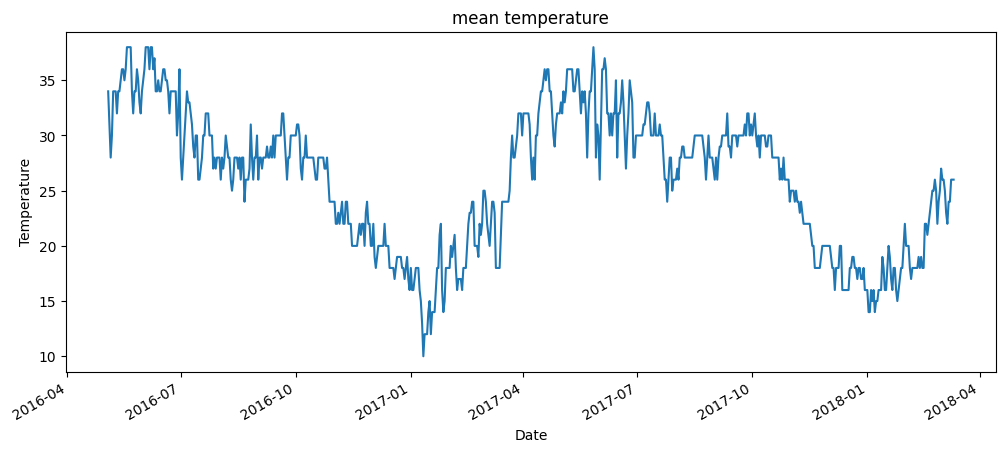

In [43]:
df['meantempm'].plot(figsize=(12, 5))
plt.title('mean temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [44]:
# Preprocess the data
data = df['meantempm'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [45]:
sequence_length = 28

In [46]:
# Prepare data for training
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length, 0])
    y.append(data_scaled[i+sequence_length, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  #(number of samples, sequence length=30, number of features=1)

In [47]:
split = int(0.8 * len(data_scaled))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [48]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X.shape[1], 1), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1361 (5.32 KB)
Trainable params: 1361 (5.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (540, 28, 1)
X_test shape: (108, 28, 1)
y_train shape: (540,)
y_test shape: (108,)


In [50]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=30, validation_split=0.1, verbose=1)

# Make predictions
test_predictions_scaled = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions_scaled).flatten()

Epoch 1/50
17/17 [==============================] - 1s 12ms/step - loss: 0.3676 - val_loss: 0.1719
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 0.1678 - val_loss: 0.0646
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0412 - val_loss: 0.0132
Epoch 4/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0029
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.0024
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0028
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.0053 - val_loss: 0.0022
Epoch 8/50
17/17 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.0018
Epoch 9/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0025
Epoch 10/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0024
Epoch 11/50
17/17 

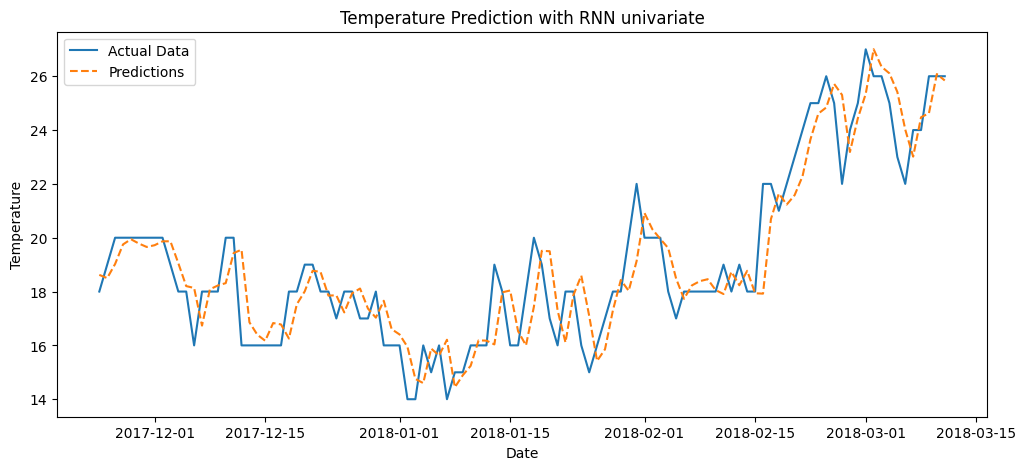

In [51]:
# Plotting predictions vs. actual
plt.figure(figsize=(12, 5))
plt.plot(df.index[split+sequence_length:], df['meantempm'][split+sequence_length:], label='Actual Data')
plt.plot(df.index[split+sequence_length:], test_predictions, label='Predictions', linestyle='dashed')
plt.title('Temperature Prediction with RNN univariate')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error
import math

y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate RMSE
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = math.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.2960384648971472


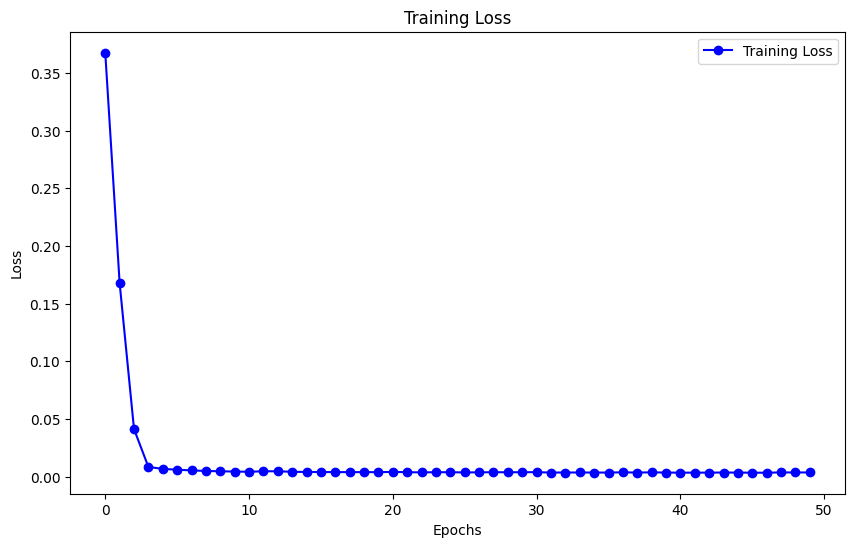

In [53]:
training_loss = history.history['loss']

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss, "bo-" , label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


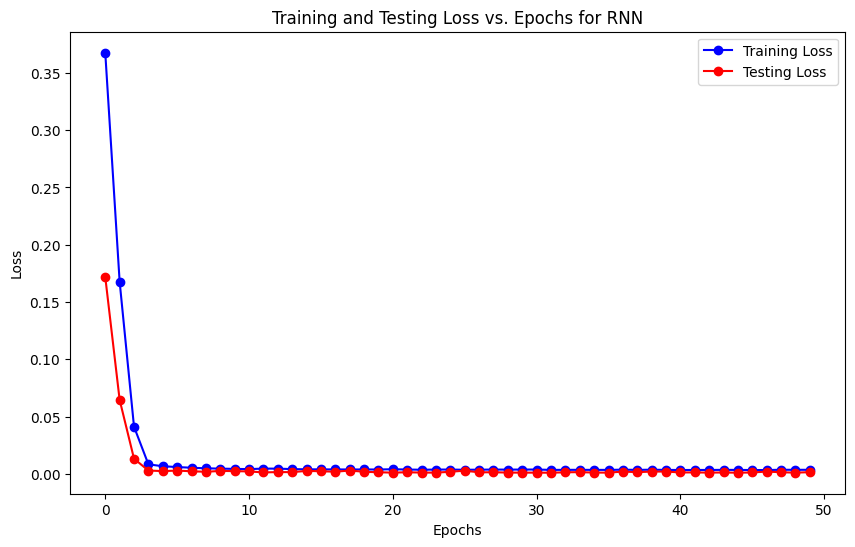

In [54]:
# Plotting Training and Testing Loss vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], 'bo-', label='Training Loss')
plt.plot(history.history['val_loss'], 'ro-', label='Testing Loss')
plt.title('Training and Testing Loss vs. Epochs for RNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()